In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('CPAWallBuyers_Q3_2016.csv')

Variable | Description | Type of Variable
---| ---| ---
age | integer 13-116; 13 lowest and 116 highest | continuous
gender| male, female| categorical
state | denotes state of home address | categorical
esp | email service provider | categorical
vag | “64% of Americans own their homes. Do you own or rent yours?”; own = TRUE, rent = FALSE | categorical
val | "Do you have a car?"; yes = TRUE, no = FALSE| categorical
vas | “Do you or a loved one have Arthritis?”; yes = TRUE, no = FALSE, arthritis = TRUE| categorical
vaq | “Do you or a loved one have Diabetes?”; yes = TRUE, no = FALSE, diabetes = TRUE | categorical
v2m | “The 2016 Presidential Election is over. How do you identify politically?”; democrat, republican, or independent | categorical
CPAWallBuyer | Identifies buyers and non-buyers on CPA Wall; yes or no | categorical
count(0) | integer count of users that meet observations across other columns in the same row; 1 - 15 | continuous 

In [3]:
data.head()

,age,gender,state,esp,vag,val,vas,vaq,v2m,CPAWallBuyer,count(0)
0,13,Male,DE,gmail.com,rent,no,no,no,independent,No,1.0
1,13,Male,MD,yahoo.com,rent,no,no,no,republican,No,1.0
2,15,Female,MN,gmail.com,rent,yes,no,no,democrat,No,1.0
3,15,Male,LA,gmail.com,rent,no,no,no,republican,No,1.0
4,16,Female,MD,verizon.net,own,TRUE,FALSE,yes,democrat,No,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54685 entries, 0 to 54684
Data columns (total 11 columns):
age             54685 non-null object
gender          54685 non-null object
state           54679 non-null object
esp             54685 non-null object
vag             54358 non-null object
val             54335 non-null object
vas             51828 non-null object
vaq             53943 non-null object
v2m             51951 non-null object
CPAWallBuyer    54682 non-null object
count(0)        54682 non-null float64
dtypes: float64(1), object(10)
memory usage: 4.6+ MB


In [5]:
data.rename(columns={'count(0)':'count'}, inplace= True)

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50086 entries, 0 to 54683
Data columns (total 11 columns):
age             50086 non-null object
gender          50086 non-null object
state           50086 non-null object
esp             50086 non-null object
vag             50086 non-null object
val             50086 non-null object
vas             50086 non-null object
vaq             50086 non-null object
v2m             50086 non-null object
CPAWallBuyer    50086 non-null object
count           50086 non-null float64
dtypes: float64(1), object(10)
memory usage: 4.6+ MB


In [8]:
data['age'] = data['age'].astype('int') # changing dtype

In [9]:
data['gender'] = pd.Categorical(data['gender'])
data['state'] = pd.Categorical(data['state'])
data['esp'] = pd.Categorical(data['esp'])
data['vag'] = pd.Categorical(data['vag'])
data['val'] = pd.Categorical(data['val'])
data['vas'] = pd.Categorical(data['vas'])
data['vaq'] = pd.Categorical(data['vaq'])
data['v2m'] = pd.Categorical(data['v2m'])
data['CPAWallBuyer'] = pd.Categorical(data['CPAWallBuyer'])

In [10]:
data.dtypes

age                int64
gender          category
state           category
esp             category
vag             category
val             category
vas             category
vaq             category
v2m             category
CPAWallBuyer    category
count            float64
dtype: object

In [11]:
states = data.groupby(['state'])

In [12]:
states['state'].value_counts().sort_values(ascending = False)

state       state     
TX          TX            3905
CA          CA            3561
FL          FL            3206
NY          NY            2363
PA          PA            2023
GA          GA            2010
OH          OH            1955
IL          IL            1900
NC          NC            1772
MI          MI            1671
TN          TN            1346
AL          AL            1300
MO          MO            1245
VA          VA            1243
IN          IN            1232
LA          LA            1208
NJ          NJ            1128
SC          SC            1075
AZ          AZ             961
MD          MD             937
KY          KY             917
MS          MS             914
WI          WI             890
OK          OK             858
MA          MA             855
WA          WA             823
AR          AR             774
CO          CO             751
MN          MN             721
CT          CT             547
                          ... 
Missouri    Miss

In [13]:
# Removing rows with States length > 2
data = data[data['state'].str.len() <= 2]

In [14]:
data['state'].unique()

[DE, MD, MN, LA, CT, ..., --, AE, WL, AP, GU]
Length: 60
Categories (60, object): [DE, MD, MN, LA, ..., AE, WL, AP, GU]

In [15]:
# Checking why 60 unique States
pd.unique(data['state'].ravel())

array(['DE', 'MD', 'MN', 'LA', 'CT', 'GA', 'HI', 'IL', 'MA', 'NV', 'NY',
       'OH', 'OK', 'PA', 'SC', 'TN', 'TX', 'FL', 'KY', 'SD', 'VA', 'AK',
       'AL', 'AR', 'AZ', 'CA', 'CO', 'DC', 'IA', 'ID', 'IN', 'KS', 'ME',
       'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'OR',
       'PR', 'RI', 'UT', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY', '5', 'XX',
       '--', 'AE', 'WL', 'AP', 'GU'], dtype=object)

In [16]:
state_list = ['AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 
              'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
              'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
              'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
              'AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PW', 'PR', 'VI', 'AE', 'AA', 'AP']

In [17]:
# Removing States not in state_list
data = data[data['state'] != 'WL']
data = data[data['state'] != '5']
data = data[data['state'] != 'XX']
data = data[data['state'] != '--']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49967 entries, 0 to 54683
Data columns (total 11 columns):
age             49967 non-null int64
gender          49967 non-null category
state           49967 non-null category
esp             49967 non-null category
vag             49967 non-null category
val             49967 non-null category
vas             49967 non-null category
vaq             49967 non-null category
v2m             49967 non-null category
CPAWallBuyer    49967 non-null category
count           49967 non-null float64
dtypes: category(9), float64(1), int64(1)
memory usage: 1.6 MB


In [19]:
data['state'].unique()

[DE, MD, MN, LA, CT, ..., WV, WY, AE, AP, GU]
Length: 56
Categories (56, object): [DE, MD, MN, LA, ..., WY, AE, AP, GU]

In [20]:
# Confirmed with tech team that responses to survey questions are 
# saved as binary TRUE, FALSE; will change responses to 1 or 0

In [21]:
data['vaq'].unique()

[no, yes, TRUE, FALSE, diabetes]
Categories (5, object): [no, yes, TRUE, FALSE, diabetes]

In [22]:
data['vaq'].replace(to_replace= 'TRUE', value = 1, inplace = True)
data['vaq'].replace(to_replace= 'diabetes', value = 0, inplace = True)
data['vaq'].replace(to_replace= 'yes', value = 1, inplace = True)
data['vaq'].replace(to_replace= 'FALSE', value = 0, inplace = True)
data['vaq'].replace(to_replace= 'no', value = 0, inplace = True)

In [23]:
data['val'].unique()

[no, yes, TRUE, FALSE, own]
Categories (5, object): [no, yes, TRUE, FALSE, own]

In [24]:
data['val'].replace(to_replace= 'TRUE', value = 1, inplace = True)
data['val'].replace(to_replace= 'own', value = 1, inplace = True)
data['val'].replace(to_replace= 'yes', value = 1, inplace = True)
data['val'].replace(to_replace= 'FALSE', value = 0, inplace = True)
data['val'].replace(to_replace= 'no', value = 0, inplace = True)

In [25]:
data['vas'].unique()

[no, FALSE, yes, TRUE, arthritis]
Categories (5, object): [no, FALSE, yes, TRUE, arthritis]

In [26]:
data['vas'].replace(to_replace= 'TRUE', value = 1, inplace = True)
data['vas'].replace(to_replace= 'arthritis', value = 1, inplace = True)
data['vas'].replace(to_replace= 'yes', value = 1, inplace = True)
data['vas'].replace(to_replace= 'FALSE', value = 0, inplace = True)
data['vas'].replace(to_replace= 'no', value = 0, inplace = True)

In [27]:
data['vag'].unique()

[rent, own, FALSE, TRUE, iownmyhome]
Categories (5, object): [rent, own, FALSE, TRUE, iownmyhome]

In [28]:
data['vag'].replace(to_replace= 'TRUE', value = 1, inplace = True)
data['vag'].replace(to_replace= 'iownmyhome', value = 1, inplace = True)
data['vag'].replace(to_replace= 'own', value = 1, inplace = True)
data['vag'].replace(to_replace= 'FALSE', value = 0, inplace = True)
data['vag'].replace(to_replace= 'rent', value = 0, inplace = True)

In [29]:
data['v2m'].unique()

[independent, republican, democrat]
Categories (3, object): [independent, republican, democrat]

In [30]:
data['CPAWallBuyer'].unique()

[No, Yes]
Categories (2, object): [No, Yes]

In [31]:
data['CPAWallBuyer'].replace(to_replace= 'Yes', value = 1, inplace = True)
data['CPAWallBuyer'].replace(to_replace= 'No', value = 0, inplace = True)

In [32]:
data['CPABuyerWeight'] = data['CPAWallBuyer']*data['count']

In [33]:
data['gender'].unique()

[Male, Female]
Categories (2, object): [Male, Female]

In [34]:
data.sample(10)

,age,gender,state,esp,vag,val,vas,vaq,v2m,CPAWallBuyer,count,CPABuyerWeight
13458,30,Female,NJ,gmail.com,0,1,0,0,independent,0,1.0,0.0
35537,51,Female,OH,hotmail.com,1,1,0,0,republican,0,1.0,0.0
16542,33,Female,OH,gmail.com,1,1,0,0,independent,0,1.0,0.0
10020,26,Male,TX,mail.com,0,1,0,0,democrat,0,1.0,0.0
19368,36,Female,CA,comcast.net,1,1,0,0,republican,0,1.0,0.0
43465,58,Male,SC,gmail.com,1,1,1,1,democrat,0,1.0,0.0
42167,57,Female,WI,gmail.com,0,0,1,0,independent,0,1.0,0.0
17215,34,Female,AR,gmail.com,0,0,1,0,independent,0,1.0,0.0
17385,34,Female,IL,gmail.com,0,0,0,1,independent,0,1.0,0.0
43909,59,Female,NY,aol.com,1,1,1,0,democrat,0,1.0,0.0


In [35]:
data.describe()

,age,vag,val,vas,vaq,CPAWallBuyer,count,CPABuyerWeight
count,49967.000000,49967.000000,49967.000000,49967.000000,49967.000000,49967.00000,49967.000000,49967.000000
mean,44.466248,0.360278,0.627774,0.257510,0.172514,0.01539,1.201393,0.018552
std,16.444989,0.480086,0.483403,0.437267,0.377830,0.12310,0.670786,0.172906
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,44.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,56.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
max,116.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,8.000000


In [36]:
age_summary = data.groupby(['age','CPABuyerWeight'])
age_summary['age'].value_counts()

age  CPABuyerWeight  age
13   0.0             13        2
15   0.0             15        2
16   0.0             16        1
17   0.0             17       25
18   0.0             18      934
     1.0             18       15
19   0.0             19     1037
     1.0             19       13
     2.0             19        2
20   0.0             20     1103
     1.0             20       13
     2.0             20        1
     4.0             20        2
21   0.0             21      976
     1.0             21       17
     2.0             21        2
     3.0             21        1
22   0.0             22      815
     1.0             22       17
     2.0             22        2
     6.0             22        1
23   0.0             23      827
     1.0             23       11
24   0.0             24      788
     1.0             24       12
     2.0             24        1
25   0.0             25      855
     1.0             25       15
     2.0             25        2
26   0.0          

In [37]:
gender_summary = data.groupby(['gender','CPABuyerWeight'])
gender_summary['gender'].value_counts()

gender  CPABuyerWeight  gender
Female  0.0             Female    28858
        1.0             Female      449
        2.0             Female       50
        3.0             Female        6
        4.0             Female        5
        5.0             Female        3
        6.0             Female        1
        7.0             Female        2
Male    0.0             Male      20340
        1.0             Male        223
        2.0             Male         21
        3.0             Male          4
        4.0             Male          3
        8.0             Male          2
Name: gender, dtype: int64

In [38]:
state_summary = data.groupby(['state','CPABuyerWeight'])
state_summary['state'].value_counts()

state  CPABuyerWeight  state
AE     0.0             AE          6
AK     0.0             AK        162
       2.0             AK          1
AL     0.0             AL       1279
       1.0             AL         18
       2.0             AL          1
       3.0             AL          1
       4.0             AL          1
AP     0.0             AP          2
AR     0.0             AR        752
       1.0             AR         18
       2.0             AR          3
       7.0             AR          1
AZ     0.0             AZ        950
       1.0             AZ         11
CA     0.0             CA       3503
       1.0             CA         49
       2.0             CA          8
       4.0             CA          1
CO     0.0             CO        743
       1.0             CO          6
       2.0             CO          2
CT     0.0             CT        538
       1.0             CT          8
       2.0             CT          1
DC     0.0             DC        200
       4.

In [39]:
esp_summary = data.groupby(['CPABuyerWeight', 'esp'])
esp_summary['esp'].value_counts(ascending= True)

CPABuyerWeight  esp                  esp                
0.0             aaps.k12.mi.us       aaps.k12.mi.us            1
                aas-c.org            aas-c.org                 1
                abe.midco.net        abe.midco.net             1
                abm.com              abm.com                   1
                abv.bg               abv.bg                    1
                accuquest.net        accuquest.net             1
                activist.com         activist.com              1
                adelphia.net         adelphia.net              2
                adrian.edu           adrian.edu                1
                aero-components.com  aero-components.com       1
                afscholars.org       afscholars.org            1
                agmail.com           agmail.com                1
                aiicfl.com           aiicfl.com                1
                aim.com              aim.com                  24
                aimtracco.com    

In [40]:
CPABuyerWeight_Sum = data.groupby('CPABuyerWeight')
CPABuyerWeight_Sum['esp'].value_counts()

CPABuyerWeight  esp              
0.0             gmail.com            24494
                yahoo.com            13969
                hotmail.com           2414
                aol.com               2259
                icloud.com             648
                comcast.net            549
                outlook.com            427
                att.net                423
                live.com               392
                ymail.com              355
                msn.com                322
                sbcglobal.net          233
                verizon.net            183
                bellsouth.net          154
                rocketmail.com         133
                cox.net                130
                charter.net             96
                me.com                  70
                mail.com                69
                frontier.com            45
                windstream.net          39
                email.com               36
                opto

In [41]:
vag_summary = data.groupby(['vag','CPABuyerWeight'])
vag_summary['vag'].value_counts()

vag  CPABuyerWeight  vag
0    0.0             0      31385
     1.0             0        510
     2.0             0         52
     3.0             0          6
     4.0             0          5
     5.0             0          3
     6.0             0          1
     7.0             0          2
     8.0             0          1
1    0.0             1      17813
     1.0             1        162
     2.0             1         19
     3.0             1          4
     4.0             1          3
     8.0             1          1
Name: vag, dtype: int64

In [42]:
val_summary = data.groupby(['val','CPABuyerWeight'])
val_summary['val'].value_counts()

val  CPABuyerWeight  val
0    0.0             0      18226
     1.0             0        331
     2.0             0         34
     3.0             0          4
     4.0             0          3
     5.0             0          1
1    0.0             1      30972
     1.0             1        341
     2.0             1         37
     3.0             1          6
     4.0             1          5
     5.0             1          2
     6.0             1          1
     7.0             1          2
     8.0             1          2
Name: val, dtype: int64

In [43]:
vas_summary = data.groupby(['vas','CPABuyerWeight'])
vas_summary['vas'].value_counts()

vas  CPABuyerWeight  vas
0    0.0             0      36473
     1.0             0        552
     2.0             0         55
     3.0             0          9
     4.0             0          7
     5.0             0          2
     7.0             0          1
     8.0             0          1
1    0.0             1      12725
     1.0             1        120
     2.0             1         16
     3.0             1          1
     4.0             1          1
     5.0             1          1
     6.0             1          1
     7.0             1          1
     8.0             1          1
Name: vas, dtype: int64

In [44]:
vaq_summary = data.groupby(['vaq','CPABuyerWeight'])
vaq_summary['vaq'].value_counts()

vaq  CPABuyerWeight  vaq
0    0.0             0      40651
     1.0             0        606
     2.0             0         66
     3.0             0          9
     4.0             0          7
     5.0             0          3
     6.0             0          1
     7.0             0          2
     8.0             0          2
1    0.0             1       8547
     1.0             1         66
     2.0             1          5
     3.0             1          1
     4.0             1          1
Name: vaq, dtype: int64

In [45]:
age_gender_summary = data.groupby(['age','gender','CPABuyerWeight'])
age_gender_summary['age'].value_counts()

age  gender  CPABuyerWeight  age
13   Male    0.0             13       2
15   Female  0.0             15       1
     Male    0.0             15       1
16   Female  0.0             16       1
17   Female  0.0             17      15
     Male    0.0             17      10
18   Female  0.0             18     447
             1.0             18       9
     Male    0.0             18     487
             1.0             18       6
19   Female  0.0             19     546
             1.0             19       9
             2.0             19       1
     Male    0.0             19     491
             1.0             19       4
             2.0             19       1
20   Female  0.0             20     549
             1.0             20       7
             2.0             20       1
             4.0             20       1
     Male    0.0             20     554
             1.0             20       6
             4.0             20       1
21   Female  0.0             21     518
       

In [46]:
data.corr()

,age,vag,val,vas,vaq,CPAWallBuyer,count,CPABuyerWeight
age,1.000000,0.251587,0.182302,0.044016,0.002519,-0.034993,-0.135918,-0.029767
vag,0.251587,1.000000,0.337777,0.054466,0.054439,-0.029819,-0.130601,-0.024587
val,0.182302,0.337777,1.000000,0.093492,0.067125,-0.029179,-0.110745,-0.019861
vas,0.044016,0.054466,0.093492,1.000000,0.271503,-0.020831,-0.128710,-0.014218
vaq,0.002519,0.054439,0.067125,0.271503,1.000000,-0.025673,-0.111423,-0.023565
CPAWallBuyer,-0.034993,-0.029819,-0.029179,-0.020831,-0.025673,1.000000,0.000758,0.858227
count,-0.135918,-0.130601,-0.110745,-0.128710,-0.111423,0.000758,1.000000,0.068558
CPABuyerWeight,-0.029767,-0.024587,-0.019861,-0.014218,-0.023565,0.858227,0.068558,1.000000


In [47]:
data[data['CPAWallBuyer']==1]['CPABuyerWeight'].sum() #Ttl converted users

927.0

In [48]:
data[data['CPAWallBuyer']==0]['CPABuyerWeight'].count() #Ttl of non-converters

49198

In [49]:
927 + 49198 #Ttl users

50125

In [50]:
927.0/50125.0 #Conversion rate; unbalanced data set

0.018493765586034914

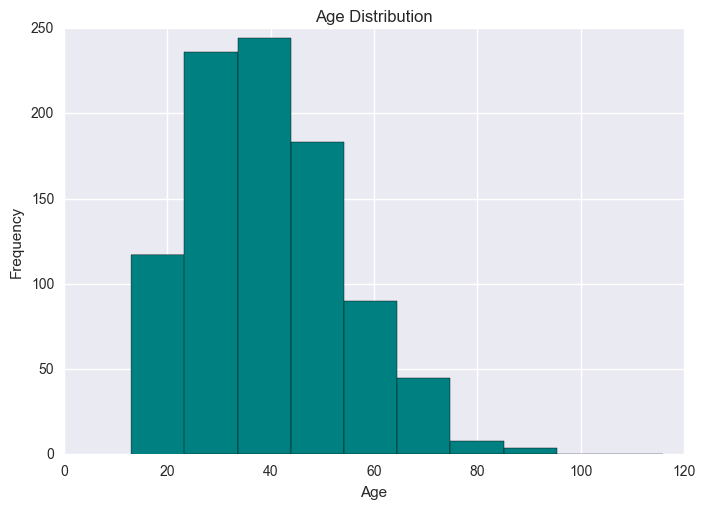

In [51]:
plt.hist(data['age'], weights= data['CPABuyerWeight'], color= 'teal')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

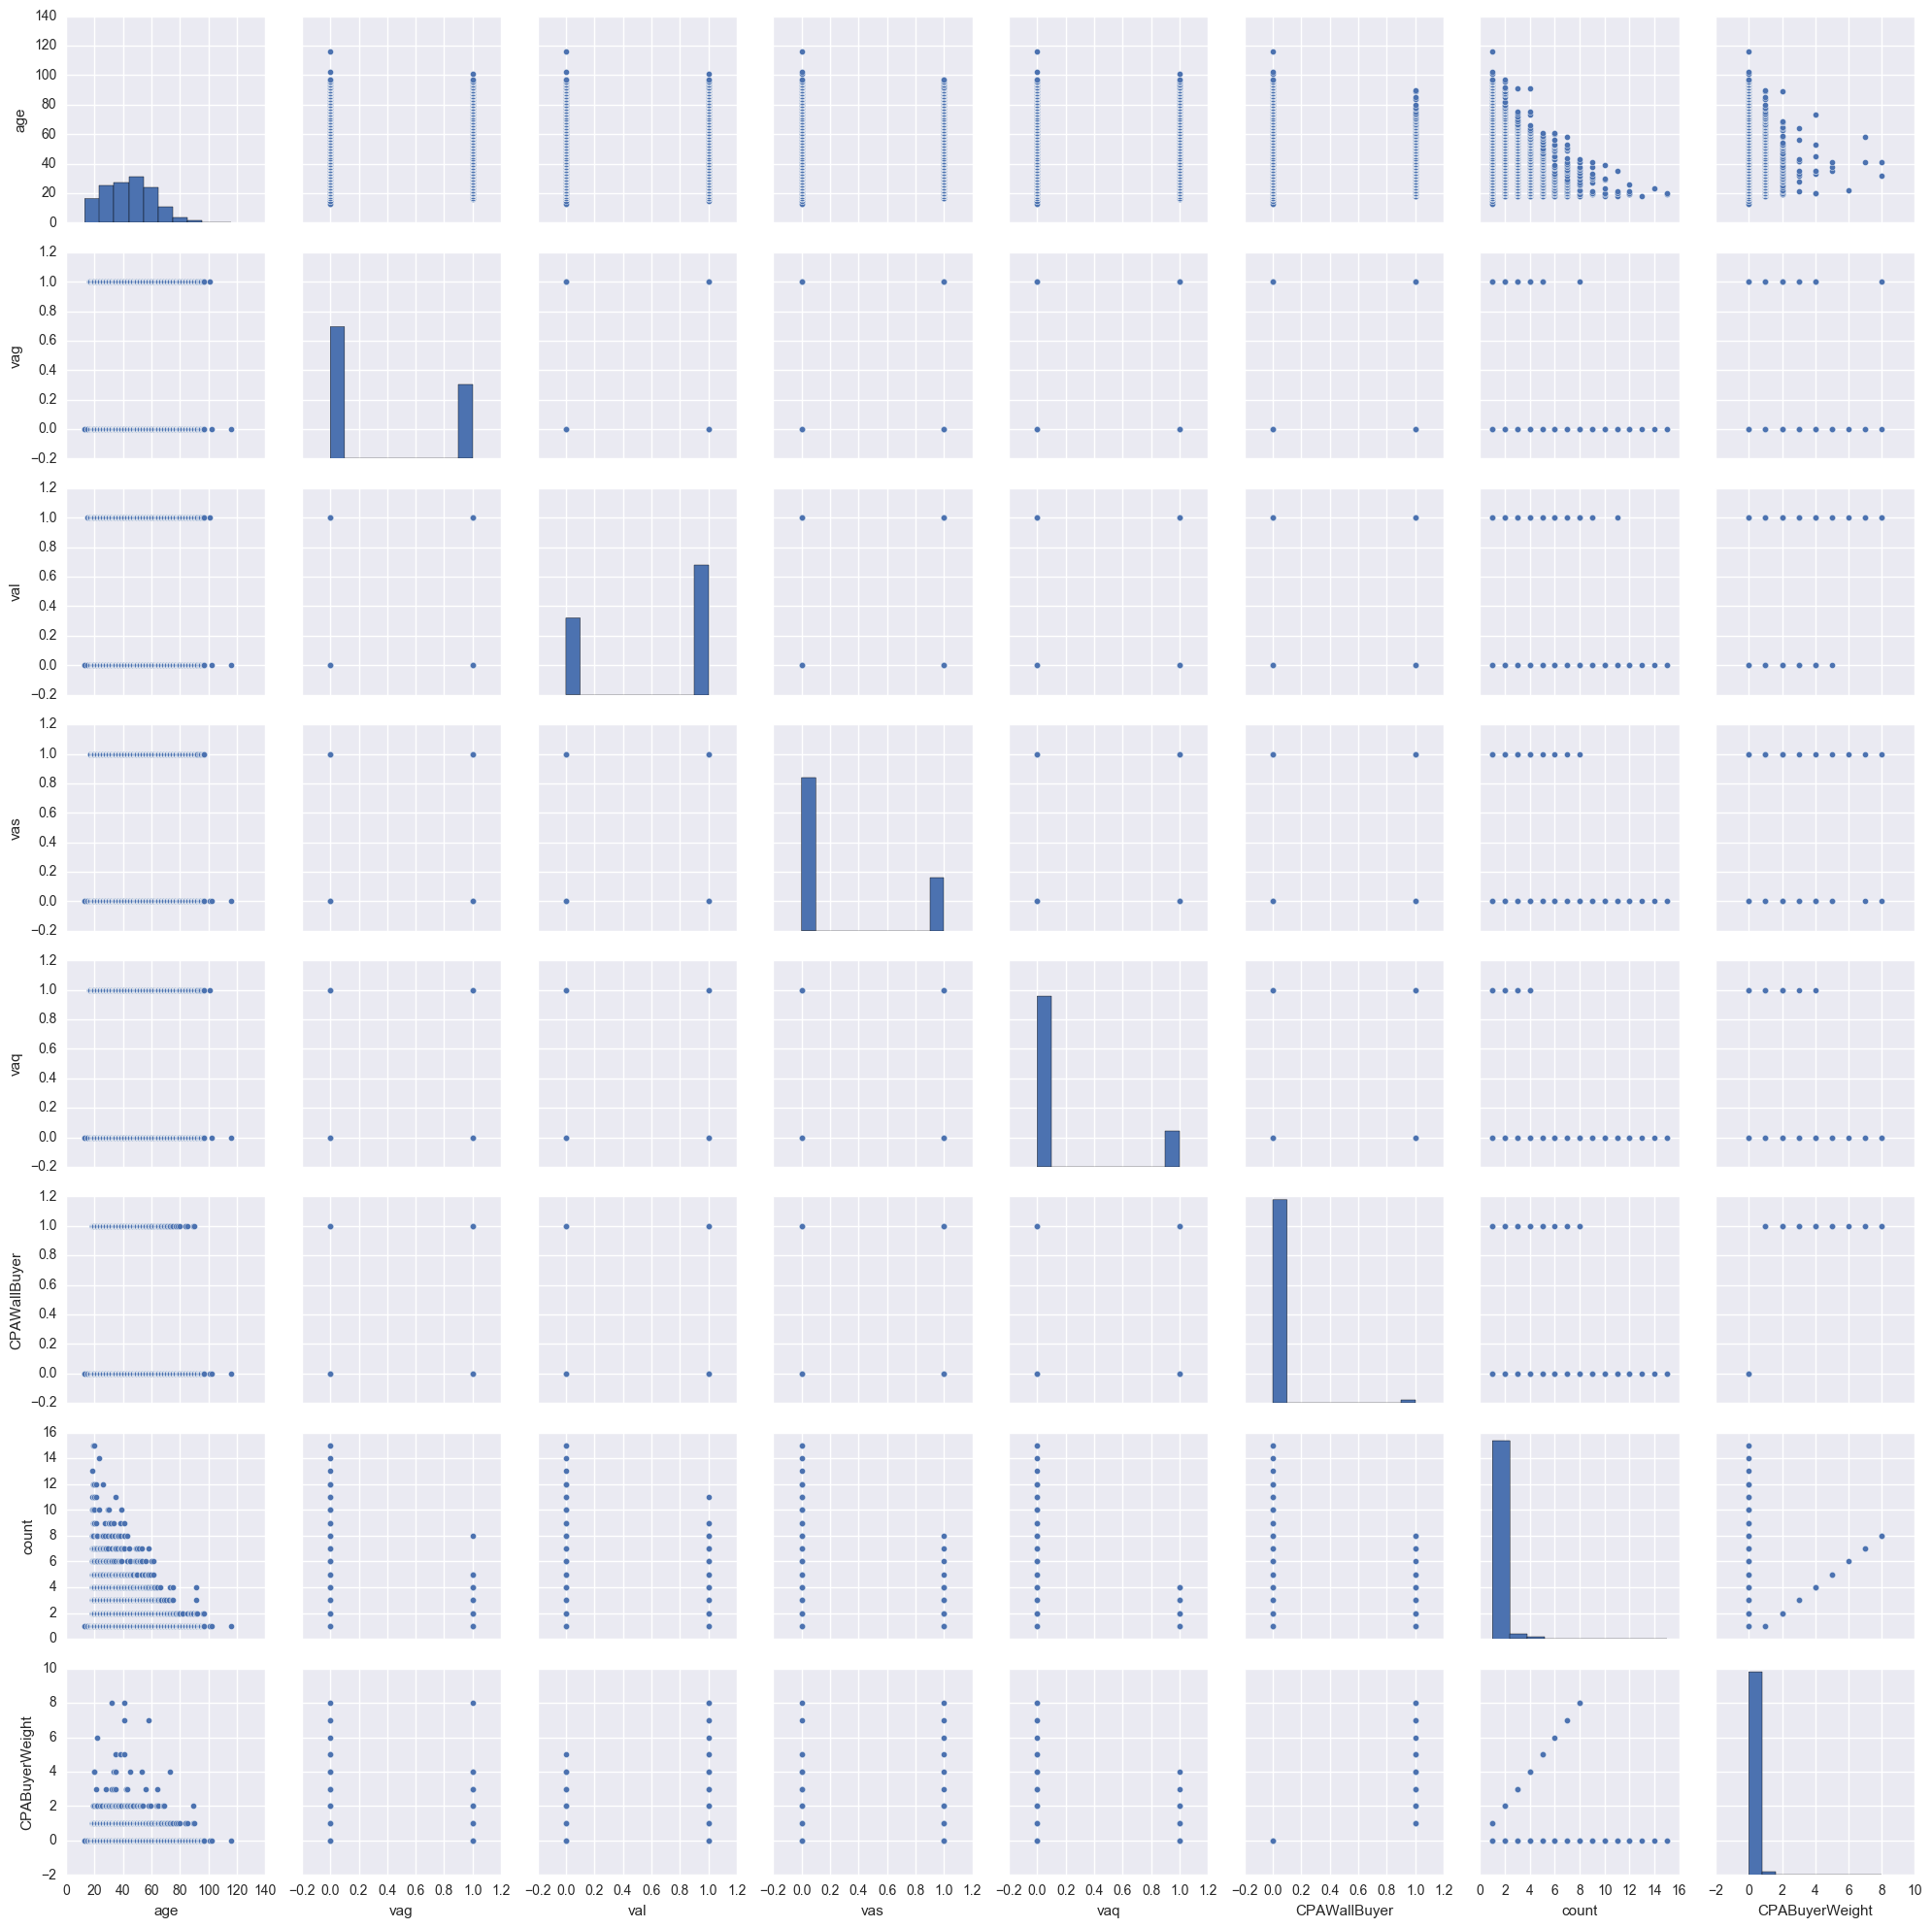

In [52]:
sns.pairplot(data)